# Metrika čitateľnosti
Jakub Marták

## Inštalácia a import knižníc

In [1]:
!pip install py-readability-metrics
!pip install textstat
!pip install textdescriptives
!pip install stanza
!python -m spacy download en_core_web_sm
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import textstat
from readability import Readability
import textdescriptives as td
from textdescriptives.utils import load_sms_data
from textdescriptives.integrations.sklearn_featurizer import TextDescriptivesFeaturizer
descriptive_stats_extractor = TextDescriptivesFeaturizer(lang="en", metrics=["descriptive_stats"])
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import graphviz
from sklearn import set_config
set_config(transform_output="pandas")
import pandas as pd
import spacy
import stanza
nlp = stanza.Pipeline(lang='sk', processors='tokenize', tokenize_no_ssplit=True)
from nltk.corpus import reuters
from nltk.tag import pos_tag
from collections import Counter, defaultdict
nltk.download('reuters')
import random
import numpy as np
from numpy.linalg import norm
import re
import math
import csv
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 881.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.4/254.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.4 MB/s eta 0:00:00
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41930 sha256=186818334e88213afb59303d0ce7f2a4a6be8b81ed7e6e3ddf90d7e907b592e2
  Stored in directory: /root/.cache/pip/wheels/92/8e/16/c1e4d4d65685d71085e4e27b44d6ed880b0559474c9ee4ff66
Successfully built ftfy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.4/970.4 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 36.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_c

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: sk (Slovak):
| Processor | Package |
-----------------------
| tokenize  | snk     |
| mwt       | snk     |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Done loading processors!
[nltk_data] Downloading package reuters to /root/nltk_data...


### Definícia funkcie na výpočet počtu slabík v slove

In [2]:
def syllab_count(slovo):
  slovo = str(slovo)
  vowels = "aeiouyáéíóúýäôAEIOUYÁÉÍÓÚÝÄÔ"
  consonants = "bcčdďfghjklĺľmnňpqrŕsštťvwxzžBCČDĎFGHJKLĹĽMNPQRŔSŠTŤVWXZŽ"
  exceptions = "lĺrŕLĹRŔ"
  count = 0
  for c in range(0, len(slovo)):
    if slovo[c] in vowels:
      if c > 0 and slovo[c] in "aeuAEU" and slovo[c-1] in "iI":
        count = count + 0
      else:
        count = count + 1
    if slovo[c] in exceptions and c > 0 and slovo[c-1] in consonants and c < len(slovo)-1 and slovo[c+1] in consonants:
      count = count + 1
  return count

## Načítanie a prvotné spracovanie predspracovaný textov pre potreby metrík čitateľnosti


In [3]:
df = pd.read_csv("text_MR.csv", sep = ";", decimal=",")
df['syllables'] = 0
for ind in df.index:
  df['syllables'][ind] = syllab_count(df['word'][ind])
df4 = pd.get_dummies(df.syllables)
df4["many"] = df4[5] + df4[6] + df4[7] + df4[8] + df4[9] + df4[10] + df4[11] + df4[12] + df4[13] + df4[14] + df4[15] + df4[16] + df4[17] + df4[18] + df4[19] + df4[20] + df4[22] + df4[25] + df4[26] + df4[31] + df4[32]
df = df.join(df4[[1,2,3,4,"many"]])
df2 = pd.get_dummies(df.pos)
df = df.join(df2)
df3 = df.groupby(['document'])[['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM',
       'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X', 'syllables', 1, 2, 3, 4, "many"]].sum()
df2 = df.groupby(['document', 'pos'])['word'].count()
df3['document'] = df3.index
first_column = df3.pop('document')
df3.insert(0, 'document', first_column)
df3['sum_words'] = df3['ADJ'] + df3['ADP'] + df3['ADV'] + df3['AUX'] + df3['CCONJ'] + df3['DET'] + df3['INTJ'] + df3['NOUN'] + df3['NUM'] + df3['PART'] + df3['PRON'] + df3['PROPN'] + df3['SCONJ'] + df3['VERB']
df3['sum_words_2'] = df3['ADJ'] + df3['ADP'] + df3['ADV'] + df3['AUX'] + df3['CCONJ'] + df3['DET'] + df3['INTJ'] + df3['NOUN'] + df3['PART'] + df3['PRON'] + df3['PROPN'] + df3['SCONJ'] + df3['VERB']
df3['sum_sent'] = 0
for ind in df3.index:
  df3['sum_sent'][ind] = len(sent_tokenize(open(df3['document'][ind]+".txt", "r").read()))
arr = df.pos.unique()
arr2 = df.document.unique()
d = {'name': arr2}
lst = []
df2 = pd.DataFrame(data=d)
df3.insert(0, "index", [23,10,11,13,21,24,27,14,17,26,12,15,18,16,0,5,30,19,22,25,20,1,2,6,8,28,31,3,7,29,9,32,4])
df3.set_index("index", inplace = True)
df3 = df3.sort_values(by=['index'])

## Načítanie nespracovaných textov pre potreby metrík čitateľnosti z knižníc

In [4]:
textlist = []
textlist.append(open("Hupsov šlabikár Lipka pre 1. ročník ZŠ, 1. časť.txt", "r").read().strip())
textlist.append(open("Pracovný zošit k Hupsovmu šlabikáru Lipka pre 1. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Prvouka pre 1. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Slovenský jazyk pre 2. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Čítanka pre 2. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Matematika pre 2. ročník ZŠ, 1. časť - pracovný zošit.txt", "r").read().strip())
textlist.append(open("Prírodoveda pre 3. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Slovenský jazyk pre 3. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Prírodoveda pre 4. ročník ZŠ - pracovná učebnica.txt", "r").read().strip())
textlist.append(open("Slovenský jazyk pre 4. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Biológia pre 5. ročník ZŠ.txt", "r").read().strip())
textlist.append(open("Biológia pre 6. ročník ZŠ a 1. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Fyzika pre 6. ročník ZŠ a 1. ročník gymnázií s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Biológia pre 7. ročník ZŠ a 2. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Dejepis pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Fyzika pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Geografia pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom-pages-2.txt", "r").read().strip())
textlist.append(open("Dejepis pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Fyzika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Matematika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom, 1. časť.txt", "r").read().strip())
textlist.append(open("Občianska náuka pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Chémia pre 1. ročník gymnázia so štvorročným štúdiom a 5. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Občianska náuka pre 1. ročník odborných učilíšť (pre žiakov s MP).txt", "r").read().strip())
textlist.append(open("Biológia 6 pre gymnáziá – Vznik života na Zemi a evolúcia, Biológia človeka.txt", "r").read().strip())
textlist.append(open("Chémia pre 2. ročník gymnázia so štvorročným štúdiom a 6. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Občianska náuka pre 2. ročník odborných učilíšť (pre žiakov s MP).txt", "r").read().strip())
textlist.append(open("Fyzika pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Chémia pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Slovenská literatúra pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM.txt", "r").read().strip())
textlist.append(open("Slovenský jazyk pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM.txt", "r").read().strip())
textlist.append(open("Matematika pre 4. ročník gymnázia a 8. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist.append(open("Slovenská literatúra pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM.txt", "r").read().strip())
textlist.append(open("Slovenský jazyk pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM.txt", "r").read().strip())

## Počítanie slabík v častiach textu pre potreby metriky SMOG

In [5]:
vetylist = []
syllabelsstart = []
syllabelsend = []
syllabelsmid = []
for i in textlist:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  for j in i[:10]:
    nltk_tokens = nltk.word_tokenize(j)
    syl = 0
    for k in nltk_tokens:
      if syllab_count(k) >= 3:
        syl = syl + 1
  syllabelsstart.append(syl)
  for j in i[-10:]:
    nltk_tokens = nltk.word_tokenize(j)
    syl = 0
    for k in nltk_tokens:
      if syllab_count(k) >= 3:
        syl = syl + 1
  syllabelsend.append(syl)
  for j in i[round(len(i)/2)-5:round(len(i)/2)+5]:
    nltk_tokens = nltk.word_tokenize(j)
    syl = 0
    for k in nltk_tokens:
      if syllab_count(k) >= 3:
        syl = syl + 1
  syllabelsmid.append(syl)
df3["syl_start"] = syllabelsstart
df3["syl_end"] = syllabelsend
df3["syl_mid"] = syllabelsmid

## Počítanie slabík a iných charakteristík textu pre potreby metriky Gunning-Fog.

In [6]:
vetylist = []
gun_sent = []
gun_word = []
gun_hard_word = []
for i in textlist:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  pocviet = 0
  pocslov = 0
  poctazslov = 0
  for j in i:
    pocviet = pocviet + 1
    nltk_tokens = nltk.word_tokenize(j)
    for k in nltk_tokens:
      if syllab_count(k) > 0:
        pocslov = pocslov + 1
        if "." not in k and "-" not in k and "…" not in k and "'" not in k:
          sl_druh = ""
          try:
            sl_druh = df.loc[df['word'] == k]["pos"].loc[df.loc[df['word'] == k].index[0]]
            lema = df.loc[df['word'] == k]["lemma"].loc[df.loc[df['word'] == k].index[0]]
            if syllab_count(lema) >= 3 and sl_druh != "NOUN":
              poctazslov = poctazslov + 1
          except:
            #print(k)
            if syllab_count(k) >= 3 and sl_druh != "NOUN":
              poctazslov = poctazslov + 1
    if pocslov >= 100:
      gun_sent.append(pocviet)
      gun_word.append(pocslov)
      gun_hard_word.append(poctazslov)
      pocviet = 0
      pocslov = 0
      poctazslov = 0
      break
df3["gun_sent"] = gun_sent
df3["gun_word"] = gun_word
df3["gun_hard_word"] = gun_hard_word

## Počítanie slabík a iných charakteristík textu pre potreby metriky Linsear-Write

In [7]:
charlist = []
for i in textlist:
  charlist.append(len(i))
df3["charlist"] = charlist
vetylist = []
lin_syl = []
for i in textlist:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  wordlist = []
  pocslov = 0
  for j in i:
    pocviet = pocviet + 1
    nltk_tokens = nltk.word_tokenize(j)
    for k in nltk_tokens:
      if syllab_count(k) > 0:
        pocslov = pocslov + 1
        wordlist.append(k)
    if pocslov >= 100:
      pocslov = 0
      break
  wordlist = wordlist[:100]
  syl = 0
  for l in wordlist:
    if syllab_count(l) >= 3:
      syl = syl + 3
    else:
      syl = syl + 1
  lin_syl.append(syl)
df3["lin_syl"] = lin_syl

## Tvorba zoznamu najpoužívanejších lem pre potreby metrík Dale-Chall a Spache

In [8]:
kw = pd.read_csv("prim-10.0-public-all-lemma_frequency.txt", sep = " ", quoting=csv.QUOTE_NONE)
kw = kw.loc[:9999]
keywords = kw["Form"].tolist()
keywords = list(dict.fromkeys(keywords))

### Výpočet priemernej dĺžky slova v slovenčine (v slabikách).

In [9]:
kw2 = pd.read_csv("prim-10.0-public-all-word_frequency.txt", sep = " ", quoting=csv.QUOTE_NONE)
keywords2 = kw2["Form"].tolist()
count2 = kw2["Count"].tolist()
supersum = 0
j = 0
k = 0
for i in keywords2:
  supersum = supersum + syllab_count(i) * count2[j]
  j = j + 1
  if syllab_count(i) > 0:
    k = k + count2[j]
print(supersum/k)

2.4135384846342385


## Počítanie ťažkých a unikátnych slov pre potreby metrík Dale-Chall a Mistríkovej metriky.

In [10]:
vetylist = []
hard_words = []
unique_words = []
for i in textlist:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  pocunikslov = 0
  poctazslov = 0
  for j in i:
    nltk_tokens = nltk.word_tokenize(j)
    pocunikslov = pocunikslov + len(Counter(nltk_tokens).keys())
    for k in nltk_tokens:
      if syllab_count(k) > 0:
        if k not in keywords:
          poctazslov = poctazslov + 1
  hard_words.append(poctazslov)
  unique_words.append(pocunikslov)
df3["hard_words"] = hard_words
df3["unique_words"] = unique_words
df3.to_csv('tab1.csv', sep=';', encoding='utf-16', index=False)
df.to_csv('text_MR_2.csv', sep=';', encoding='utf-16', index=False)

### Výpočet výsledkov metrík z knižnice **TextDescriptives:**

In [13]:
metricslist = []
for i in textlist:
  metricslist.append(td.extract_metrics(text=i, lang="en", metrics=['readability']))
dfTD = pd.concat(metricslist)
dfTD.insert(0, "name", ["metrics1SJ","metrics1SJL","metrics1PR","metrics2SJ","metrics2SJL","metrics2MAT","metrics3PR","metrics3SJ","metrics4PR","metrics4SJ","metrics5PR","metrics6PR","metrics6FYZ","metrics7PR","metrics8DEJ","metrics8FYZ","metrics8GEO","metrics9DEJ","metrics9FYZ","metrics9MAT","metrics9OBN","metrics10CHE","metrics10OBN","metrics11PR","metrics11CHE","metrics11OBN","metrics12FYZ","metrics12CHE","metrics12SJL","metrics12SJ","metrics13MAT","metrics13SJL","metrics13SJ"])
dfTD.insert(1, "document", ["Hupsov šlabikár Lipka pre 1. ročník ZŠ, 1. časť","Pracovný zošit k Hupsovmu šlabikáru Lipka pre 1. ročník ZŠ","Prvouka pre 1. ročník ZŠ","Slovenský jazyk pre 2. ročník ZŠ","Čítanka pre 2. ročník ZŠ","Matematika pre 2. ročník ZŠ, 1. časť - pracovný zošit","Prírodoveda pre 3. ročník ZŠ","Slovenský jazyk pre 3. ročník ZŠ","Prírodoveda pre 4. ročník ZŠ - pracovná učebnica","Slovenský jazyk pre 4. ročník ZŠ","Biológia pre 5. ročník ZŠ","Biológia pre 6. ročník ZŠ a 1. ročník gymnázia s osemročným štúdiom","Fyzika pre 6. ročník ZŠ a 1. ročník gymnázií s osemročným štúdiom","Biológia pre 7. ročník ZŠ a 2. ročník gymnázia s osemročným štúdiom","Dejepis pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom","Fyzika pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom","Geografia pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom-pages-2","Dejepis pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom","Fyzika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom","Matematika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom, 1. časť","Občianska náuka pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom","Chémia pre 1. ročník gymnázia so štvorročným štúdiom a 5. ročník gymnázia s osemročným štúdiom","Občianska náuka pre 1. ročník odborných učilíšť (pre žiakov s MP)","Biológia 6 pre gymnáziá – Vznik života na Zemi a evolúcia, Biológia človeka","Chémia pre 2. ročník gymnázia so štvorročným štúdiom a 6. ročník gymnázia s osemročným štúdiom","Občianska náuka pre 2. ročník odborných učilíšť (pre žiakov s MP)","Fyzika pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom","Chémia pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom","Slovenská literatúra pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM","Slovenský jazyk pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM","Matematika pre 4. ročník gymnázia a 8. ročník gymnázia s osemročným štúdiom","Slovenská literatúra pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM","Slovenský jazyk pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM"])
dfTD.insert(2, "grade", [1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3])
dfTD.insert(3, "year", [1,1,1,2,2,2,3,3,4,4,5,6,6,7,8,8,8,9,9,9,9,10,10,11,11,11,12,12,12,12,13,13,13])
dfTD.insert(4, "subject", ["SJ","SJL","PR","SJ","SJL","MAT","PR","SJ","PR","SJ","PR","PR","FYZ","PR","DEJ","FYZ","GEO","DEJ","FYZ","MAT","OBN","CHE","OBN","PR","CHE","OBN","FYZ","CHE","SJL","SJ","MAT","SJL","SJ"])
dfTD.reset_index(inplace = True)
dfTD = dfTD.drop(["index","text"], axis=1)

Pre sk a cs nie sú dostupné metriky. Pracujeme s en.

### Výpočet výsledkov metrík z knižnice **Py-Readability-Metrics:**

In [15]:
Readabilitylist = []
for i in textlist:
  Readabilitylist.append(Readability(i))
fklist = []
fklist_score = []
fklist_grade_level = []
flist = []
flist_score = []
flist_ease = []
flist_grade_level = []
dclist = []
dclist_score = []
dclist_grade_level = []
arilist = []
arilist_score = []
arilist_grade_level = []
arilist_ages = []
cllist = []
cllist_score = []
cllist_grade_level = []
gflist = []
gflist_score = []
gflist_grade_level = []
smoglist = []
smoglist_score = []
smoglist_grade_level = []
smogalist = []
smogalist_score = []
smogalist_grade_level = []
slist = []
slist_score = []
slist_grade_level = []
lwlist = []
lwlist_score = []
lwlist_grade_level = []
for i in Readabilitylist:
  fklist.append(i.flesch_kincaid())
  flist.append(i.flesch())
  dclist.append(i.dale_chall())
  arilist.append(i.ari())
  cllist.append(i.coleman_liau())
  gflist.append(i.gunning_fog())
  smoglist.append(i.smog())
  smogalist.append(i.smog(all_sentences=True))
  slist.append(i.spache())
  lwlist.append(i.linsear_write())
for i in fklist:
  fklist_score.append(i.score)
  fklist_grade_level.append(i.grade_level)
dfTD.insert(len(dfTD.columns),"R_flesch_kincaid_score", fklist_score, True)
dfTD.insert(len(dfTD.columns),"R_flesch_kincaid_grade_level", fklist_grade_level, True)
for i in flist:
  flist_score.append(i.score)
  flist_ease.append(i.ease)
  flist_grade_level.append(i.grade_levels)
dfTD.insert(len(dfTD.columns),"R_flesch_score", flist_score, True)
dfTD.insert(len(dfTD.columns),"R_flesch_ease", flist_ease, True)
dfTD.insert(len(dfTD.columns),"R_flesch_grade_levels", flist_grade_level, True)
for i in dclist:
  dclist_score.append(i.score)
  dclist_grade_level.append(i.grade_levels)
dfTD.insert(len(dfTD.columns),"R_dale_chall_score", dclist_score, True)
dfTD.insert(len(dfTD.columns),"R_dale_chall_grade_levels", dclist_grade_level, True)
for i in arilist:
  arilist_score.append(i.score)
  arilist_ages.append(i.ages)
  arilist_grade_level.append(i.grade_levels)
dfTD.insert(len(dfTD.columns),"R_ari_score", arilist_score, True)
dfTD.insert(len(dfTD.columns),"R_ari_grade_levels", arilist_grade_level, True)
dfTD.insert(len(dfTD.columns),"R_ari_ages", arilist_ages, True)
for i in cllist:
  cllist_score.append(i.score)
  cllist_grade_level.append(i.grade_level)
dfTD.insert(len(dfTD.columns),"R_coleman_liau_score", cllist_score, True)
dfTD.insert(len(dfTD.columns),"R_coleman_liau_grade_level", cllist_grade_level, True)
for i in gflist:
  gflist_score.append(i.score)
  gflist_grade_level.append(i.grade_level)
dfTD.insert(len(dfTD.columns),"R_gunning_fog_score", gflist_score, True)
dfTD.insert(len(dfTD.columns),"R_gunning_fog_grade_level", gflist_grade_level, True)
for i in smoglist:
  smoglist_score.append(i.score)
  smoglist_grade_level.append(i.grade_level)
dfTD.insert(len(dfTD.columns),"R_smog_score", smoglist_score, True)
dfTD.insert(len(dfTD.columns),"R_smog_grade_level", smoglist_grade_level, True)
for i in smogalist:
  smogalist_score.append(i.score)
  smogalist_grade_level.append(i.grade_level)
dfTD.insert(len(dfTD.columns),"R_smog_all_sentences_score", smogalist_score, True)
dfTD.insert(len(dfTD.columns),"R_smog_all_sentences_grade_level", smogalist_grade_level, True)
for i in slist:
  slist_score.append(i.score)
  slist_grade_level.append(i.grade_level)
dfTD.insert(len(dfTD.columns),"R_spache_score", slist_score, True)
dfTD.insert(len(dfTD.columns),"R_spache_grade_level", slist_grade_level, True)
for i in lwlist:
  lwlist_score.append(i.score)
  lwlist_grade_level.append(i.grade_level)
dfTD.insert(len(dfTD.columns),"R_linsear_write_score", lwlist_score, True)
dfTD.insert(len(dfTD.columns),"R_linsear_write_grade_level", lwlist_grade_level, True)

### Výpočet výsledkov metrík z knižnice **TextStat:**

In [16]:
tfllist = []
tfkglist = []
tgflist = []
tsmoglist = []
tarilist = []
tcllist = []
tdclist = []
tstdlist = []
tlwlist = []
tslist = []
teflawlist = []
trtlist = []
tsyllist = []
tlexlist = []
tsentlist = []
tcharlist = []
tletlist = []
tpolylist = []
tmonolist = []
tdifflist = []
for i in textlist:
  tfllist.append(textstat.flesch_reading_ease(i))
  tfkglist.append(textstat.flesch_kincaid_grade(i))
  tgflist.append(textstat.gunning_fog(i))
  tsmoglist.append(textstat.smog_index(i))
  tarilist.append(textstat.automated_readability_index(i))
  tcllist.append(textstat.coleman_liau_index(i))
  tlwlist.append(textstat.linsear_write_formula(i))
  tdclist.append(textstat.dale_chall_readability_score(i))
  tstdlist.append(textstat.text_standard(i, float_output=False))
  tslist.append(textstat.spache_readability(i))
  teflawlist.append(textstat.mcalpine_eflaw(i))
  trtlist.append(textstat.reading_time(i, ms_per_char=14.69))
  tsyllist.append(textstat.syllable_count(i))
  tlexlist.append(textstat.lexicon_count(i, removepunct=True))
  tsentlist.append(textstat.sentence_count(i))
  tcharlist.append(textstat.char_count(i, ignore_spaces=True))
  tletlist.append(textstat.letter_count(i, ignore_spaces=True))
  tpolylist.append(textstat.polysyllabcount(i))
  tmonolist.append(textstat.monosyllabcount(i))
  tdifflist.append(textstat.difficult_words(i))
dfTD.insert(len(dfTD.columns),"T_flesch_reading_ease", tfllist, True)
dfTD.insert(len(dfTD.columns),"T_flesch_kincaid_grade", tfkglist, True)
dfTD.insert(len(dfTD.columns),"T_gunning_fog", tgflist, True)
dfTD.insert(len(dfTD.columns),"T_smog_index", tsmoglist, True)
dfTD.insert(len(dfTD.columns),"T_automated_readability_index", tarilist, True)
dfTD.insert(len(dfTD.columns),"T_coleman_liau_index", tcllist, True)
dfTD.insert(len(dfTD.columns),"T_linsear_write_formula", tlwlist, True)
dfTD.insert(len(dfTD.columns),"T_dale_chall_readability_score", tdclist, True)
dfTD.insert(len(dfTD.columns),"T_text_standard", tstdlist, True)
dfTD.insert(len(dfTD.columns),"T_spache_readability", tslist, True)
dfTD.insert(len(dfTD.columns),"T_mcalpine_eflaw", teflawlist, True)
dfTD.insert(len(dfTD.columns),"T_reading_time", trtlist, True)
dfTD.insert(len(dfTD.columns),"T_syllable_count", tsyllist, True)
dfTD.insert(len(dfTD.columns),"T_lexicon_count", tlexlist, True)
dfTD.insert(len(dfTD.columns),"T_sentence_count", tsentlist, True)
dfTD.insert(len(dfTD.columns),"T_char_count", tcharlist, True)
dfTD.insert(len(dfTD.columns),"T_letter_count", tletlist, True)
dfTD.insert(len(dfTD.columns),"T_polysyllabcount", tpolylist, True)
dfTD.insert(len(dfTD.columns),"T_monosyllabcount", tmonolist, True)
dfTD.insert(len(dfTD.columns),"T_difficult_words", tdifflist, True)
dfTD.to_csv('tab2.csv', sep=';', encoding='utf-16', index=False)

## Medzisúčty pre naše vzorce:

In [17]:
dfcomp = dfTD[['name', "document", 'year', 'grade', 'subject', 'token_length_mean', 'token_length_median', 'token_length_std', 'sentence_length_mean', 'sentence_length_median', 'sentence_length_std', 'syllables_per_token_mean', 'syllables_per_token_median', 'syllables_per_token_std', 'n_tokens', 'T_lexicon_count', 'n_unique_tokens', 'proportion_unique_tokens', 'n_characters', 'T_char_count', 'T_letter_count', 'n_sentences', 'T_sentence_count', 'T_reading_time', 'T_syllable_count', 'T_polysyllabcount', 'T_monosyllabcount', 'T_difficult_words']]
dfcomp.insert(15, "sum_words", df3["sum_words"])
dfcomp.insert(16, "sum_words_2", df3["sum_words_2"])
dfcomp.insert(22, "charlist", df3["charlist"])
dfcomp.insert(23, "sum_sent", df3["sum_sent"])
dfcomp.insert(27, "syllables", df3["syllables"])
dfcomp.insert(29, "multi syllables", df3[2] + df3[3] + df3[4] + df3["many"])
dfcomp.insert(30, "two syllables", df3[2])
dfcomp.insert(31, "three syllables", df3[3])
dfcomp.insert(32, "four syllables", df3[4])
dfcomp.insert(34, "many syllables", df3["many"])
dfcomp.insert(36, "single syllables", df3[1])
dfcomp.insert(38, "smog_syllables", df3["syl_start"]+df3["syl_end"]+df3["syl_mid"])
dfcomp.insert(40, "gun_sent", df3["gun_sent"])
dfcomp.insert(41, "gun_word", df3["gun_word"])
dfcomp.insert(42, "gun_hard_word", df3["gun_hard_word"])
dfcomp.insert(43, "lin_syl", df3["lin_syl"])
dfcomp.insert(44, "hard_words", df3["hard_words"])
dfcomp.insert(45, "unique_words", df3["unique_words"])
dfcomp.insert(46, "NUM", df3["NUM"])
dfcomp.insert(47, "PROPN", df3["PROPN"])
dfcomp.insert(48, "SCONJ", df3["SCONJ"])

## Výpočet našich vlastných vzorcov:


In [18]:
dfmetr = dfTD[['name', "document", 'year', 'grade', 'subject', 'flesch_kincaid_grade', 'R_flesch_kincaid_grade_level', 'T_flesch_kincaid_grade', 'smog', 'R_smog_score', 'R_smog_all_sentences_score', 'T_smog_index', 'gunning_fog', 'R_gunning_fog_score', 'T_gunning_fog', 'automated_readability_index', 'R_ari_score', 'T_automated_readability_index', 'coleman_liau_index', 'R_coleman_liau_score', 'T_coleman_liau_index', 'R_spache_score', 'T_spache_readability', 'R_linsear_write_score', 'T_linsear_write_formula', 'R_dale_chall_score', 'T_dale_chall_readability_score']]
dfmetr.insert(8, "M_flesch_kincaid", 0)
dfmetr.insert(13, "M_smog", 0)
dfmetr.insert(17, "M_gunning_fog", 0)
dfmetr.insert(21, "M_ari", 0)
dfmetr.insert(25, "M_coleman_liau", 0)
dfmetr.insert(28, "M_spache", 0)
dfmetr.insert(31, "M_linsear_write", 0)
dfmetr.insert(34, "M_dale_chall", 0)
dfmetr.insert(35, "M_Mistrík", 0)
for ind in dfmetr.index:
  dfmetr['M_flesch_kincaid'][ind] = 0.39*(dfcomp["sum_words"][ind]/dfcomp["sum_sent"][ind])+11.8*(dfcomp["syllables"][ind]/dfcomp["sum_words"][ind])-15.59
  dfmetr['M_smog'][ind] = 3 + math.sqrt(dfcomp['smog_syllables'][ind])
  dfmetr['M_gunning_fog'][ind] = 0.4*(dfcomp['gun_word'][ind]/dfcomp['gun_sent'][ind] + 100*(dfcomp['gun_hard_word'][ind]/dfcomp['gun_word'][ind]))
  dfmetr['M_ari'][ind] = 0.5*(dfcomp['sum_words'][ind]/dfcomp['sum_sent'][ind]) + 4.71*(dfcomp['charlist'][ind]/dfcomp['sum_words'][ind])-21.43
  dfmetr['M_coleman_liau'][ind] = 5.88*(dfcomp['charlist'][ind]/dfcomp['sum_words'][ind])-29.6*(dfcomp['sum_sent'][ind]/dfcomp['sum_words'][ind])-15.8
  dfmetr['M_spache'][ind] = (0.121*dfcomp['sum_words'][ind]/dfcomp['sum_sent'][ind])+(8.2*dfcomp['hard_words'][ind]/dfcomp['sum_words'][ind])+0.659
  if (dfcomp['lin_syl'][ind]/dfcomp['gun_sent'][ind]) > 20:
    dfmetr['M_linsear_write'][ind] = (dfcomp['lin_syl'][ind]/dfcomp['gun_sent'][ind])/2
  else:
    dfmetr['M_linsear_write'][ind] = (dfcomp['lin_syl'][ind]/dfcomp['gun_sent'][ind])/2-1
  dfmetr['M_dale_chall'][ind] = 0.1579*(dfcomp['hard_words'][ind]/dfcomp['sum_words'][ind]*100) + 0.0496*(dfcomp['sum_words'][ind]/dfcomp['sum_sent'][ind])
  dfmetr['M_Mistrík'][ind] = 50-(((dfcomp['sum_words'][ind]/dfcomp['sum_sent'][ind])*(dfcomp["syllables"][ind]/dfcomp["sum_words"][ind]))/(dfcomp["sum_words"][ind]/dfcomp["unique_words"][ind]))
  #*(1+(dfcomp["sum_words"][ind]/(dfcomp["NUM"][ind]+dfcomp["PROPN"][ind])))*(1+(dfcomp["SCONJ"][ind]/dfcomp["sum_words"][ind])))

## Výpočet našich vlastných vzorcov, kde nepovažujeme čísla za slová:

In [19]:
dfmetrx = dfTD[['name', "document", 'year', 'grade', 'subject']]
dfmetrx.insert(5, "M_flesch_kincaid", 0)
dfmetrx.insert(6, "M_smog", 0)
dfmetrx.insert(7, "M_gunning_fog", 0)
dfmetrx.insert(8, "M_ari", 0)
dfmetrx.insert(9, "M_coleman_liau", 0)
dfmetrx.insert(10, "M_spache", 0)
dfmetrx.insert(11, "M_linsear_write", 0)
dfmetrx.insert(12, "M_dale_chall", 0)
dfmetrx.insert(13, "M_Mistrík", 0)
for ind in dfmetrx.index:
  dfmetrx['M_flesch_kincaid'][ind] = 0.39*(dfcomp["sum_words_2"][ind]/dfcomp["sum_sent"][ind])+11.8*(dfcomp["syllables"][ind]/dfcomp["sum_words_2"][ind])-15.59
  dfmetrx['M_smog'][ind] = 3 + math.sqrt(dfcomp['smog_syllables'][ind])
  dfmetrx['M_gunning_fog'][ind] = 0.4*(dfcomp['gun_word'][ind]/dfcomp['gun_sent'][ind] + 100*(dfcomp['gun_hard_word'][ind]/dfcomp['gun_word'][ind]))
  dfmetrx['M_ari'][ind] = 0.5*(dfcomp['sum_words'][ind]/dfcomp['sum_sent'][ind]) + 4.71*(dfcomp['charlist'][ind]/dfcomp['sum_words'][ind])-21.43
  dfmetrx['M_coleman_liau'][ind] = 5.88*(dfcomp['charlist'][ind]/dfcomp['sum_words'][ind])-29.6*(dfcomp['sum_sent'][ind]/dfcomp['sum_words'][ind])-15.8
  dfmetrx['M_spache'][ind] = (0.121*dfcomp['sum_words_2'][ind]/dfcomp['sum_sent'][ind])+(8.2*dfcomp['hard_words'][ind]/dfcomp['sum_words_2'][ind])+0.659
  if (dfcomp['lin_syl'][ind]/dfcomp['gun_sent'][ind]) > 20:
    dfmetrx['M_linsear_write'][ind] = (dfcomp['lin_syl'][ind]/dfcomp['gun_sent'][ind])/2
  else:
    dfmetrx['M_linsear_write'][ind] = (dfcomp['lin_syl'][ind]/dfcomp['gun_sent'][ind])/2-1
  dfmetrx['M_dale_chall'][ind] = 0.1579*(dfcomp['hard_words'][ind]/dfcomp['sum_words_2'][ind]*100) + 0.0496*(dfcomp['sum_words_2'][ind]/dfcomp['sum_sent'][ind])
  dfmetrx['M_Mistrík'][ind] = 50-(((dfcomp['sum_words_2'][ind]/dfcomp['sum_sent'][ind])*(dfcomp["syllables"][ind]/dfcomp["sum_words_2"][ind]))/(dfcomp["sum_words_2"][ind]/dfcomp["unique_words"][ind]))

## Teraz celý postup zopakujeme po odstránení úvodov a záverov z pôvodných textov:

In [21]:
dfx = pd.read_csv("text_MR34.csv", sep = ";", decimal=",")
dfx['syllables'] = 0
for ind in dfx.index:
  dfx['syllables'][ind] = syllab_count(dfx['word'][ind])
df5 = pd.get_dummies(dfx.syllables)
df5["many"] = df5[5] + df5[6] + df5[7] + df5[8] + df5[9] + df5[10] + df5[11] + df5[12] + df5[13] + df5[14] + df5[15] + df5[17] + df5[18] + df5[20] + df5[22] + df5[26] + df5[31] + df5[32]
dfx = dfx.join(df5[[1,2,3,4,"many"]])
dfx2 = pd.get_dummies(dfx.pos)
dfx = dfx.join(dfx2)
dfx3 = dfx.groupby(['document'])[['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM',
       'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X', 'syllables', 1, 2, 3, 4, "many"]].sum()
dfx2 = dfx.groupby(['document', 'pos'])['word'].count()
dfx3['document'] = dfx3.index
first_column = dfx3.pop('document')
dfx3.insert(0, 'document', first_column)
dfx3['sum_words'] = dfx3['ADJ'] + dfx3['ADP'] + dfx3['ADV'] + dfx3['AUX'] + dfx3['CCONJ'] + dfx3['DET'] + dfx3['INTJ'] + dfx3['NOUN'] + dfx3['NUM'] + dfx3['PART'] + dfx3['PRON'] + dfx3['PROPN'] + dfx3['SCONJ'] + dfx3['VERB']
dfx3['sum_words_2'] = dfx3['ADJ'] + dfx3['ADP'] + dfx3['ADV'] + dfx3['AUX'] + dfx3['CCONJ'] + dfx3['DET'] + dfx3['INTJ'] + dfx3['NOUN'] + dfx3['PART'] + dfx3['PRON'] + dfx3['PROPN'] + dfx3['SCONJ'] + dfx3['VERB']
dfx3['sum_sent'] = 0
for ind in dfx3.index:
  dfx3['sum_sent'][ind] = len(sent_tokenize(open(dfx3['document'][ind]+".txt", "r").read()))
arr = dfx.pos.unique()
arr2 = dfx.document.unique()
d = {'name': arr2}
lst = []
dfx2 = pd.DataFrame(data=d)
dfx3.insert(0, "index", [23,10,11,13,21,24,27,14,17,26,12,15,18,16,0,5,30,19,22,25,20,1,2,6,8,28,31,3,7,29,9,32,4])
dfx3.set_index("index", inplace = True)
dfx3 = dfx3.sort_values(by=['index'])
textlist2 = []
textlist2.append(open("2 Hupsov šlabikár Lipka pre 1. ročník ZŠ, 1. časť.txt", "r").read().strip())
textlist2.append(open("3 Pracovný zošit k Hupsovmu šlabikáru Lipka pre 1. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Prvouka pre 1. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Slovenský jazyk pre 2. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Čítanka pre 2. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Matematika pre 2. ročník ZŠ, 1. časť - pracovný zošit.txt", "r").read().strip())
textlist2.append(open("2 Prírodoveda pre 3. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Slovenský jazyk pre 3. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Prírodoveda pre 4. ročník ZŠ - pracovná učebnica.txt", "r").read().strip())
textlist2.append(open("2 Slovenský jazyk pre 4. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Biológia pre 5. ročník ZŠ.txt", "r").read().strip())
textlist2.append(open("2 Biológia pre 6. ročník ZŠ a 1. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Fyzika pre 6. ročník ZŠ a 1. ročník gymnázií s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Biológia pre 7. ročník ZŠ a 2. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Dejepis pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Fyzika pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Geografia pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom-pages-2.txt", "r").read().strip())
textlist2.append(open("2 Dejepis pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Fyzika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Matematika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom, 1. časť.txt", "r").read().strip())
textlist2.append(open("2 Občianska náuka pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Chémia pre 1. ročník gymnázia so štvorročným štúdiom a 5. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Občianska náuka pre 1. ročník odborných učilíšť (pre žiakov s MP).txt", "r").read().strip())
textlist2.append(open("2 Biológia 6 pre gymnáziá – Vznik života na Zemi a evolúcia, Biológia človeka.txt", "r").read().strip())
textlist2.append(open("2 Chémia pre 2. ročník gymnázia so štvorročným štúdiom a 6. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Občianska náuka pre 2. ročník odborných učilíšť (pre žiakov s MP).txt", "r").read().strip())
textlist2.append(open("2 Fyzika pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Chémia pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Slovenská literatúra pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM.txt", "r").read().strip())
textlist2.append(open("2 Slovenský jazyk pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM.txt", "r").read().strip())
textlist2.append(open("2 Matematika pre 4. ročník gymnázia a 8. ročník gymnázia s osemročným štúdiom.txt", "r").read().strip())
textlist2.append(open("2 Slovenská literatúra pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM.txt", "r").read().strip())
textlist2.append(open("2 Slovenský jazyk pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM.txt", "r").read().strip())
vetylist = []
syllabelsstart = []
syllabelsend = []
syllabelsmid = []
for i in textlist2:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  for j in i[:10]:
    nltk_tokens = nltk.word_tokenize(j)
    syl = 0
    for k in nltk_tokens:
      if syllab_count(k) >= 3:
        syl = syl + 1
  syllabelsstart.append(syl)
  for j in i[-10:]:
    nltk_tokens = nltk.word_tokenize(j)
    syl = 0
    for k in nltk_tokens:
      if syllab_count(k) >= 3:
        syl = syl + 1
  syllabelsend.append(syl)
  for j in i[round(len(i)/2)-5:round(len(i)/2)+5]:
    nltk_tokens = nltk.word_tokenize(j)
    syl = 0
    for k in nltk_tokens:
      if syllab_count(k) >= 3:
        syl = syl + 1
  syllabelsmid.append(syl)
dfx3["syl_start"] = syllabelsstart
dfx3["syl_end"] = syllabelsend
dfx3["syl_mid"] = syllabelsmid

In [22]:
vetylist = []
gun_sent = []
gun_word = []
gun_hard_word = []
for i in textlist2:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  pocviet = 0
  pocslov = 0
  poctazslov = 0
  for j in i:
    pocviet = pocviet + 1
    nltk_tokens = nltk.word_tokenize(j)
    for k in nltk_tokens:
      if syllab_count(k) > 0:
        pocslov = pocslov + 1
        k = k.replace(".", "")
        k = k.replace("€", "")
        sl_druh = ""
        try:
          sl_druh = dfx.loc[dfx['word'] == k]["pos"].loc[dfx.loc[dfx['word'] == k].index[0]]
          lema = dfx.loc[dfx['word'] == k]["lemma"].loc[dfx.loc[dfx['word'] == k].index[0]]
          if syllab_count(lema) >= 3 and sl_druh != "NOUN":
            poctazslov = poctazslov + 1
        except:
          if syllab_count(k) >= 3 and sl_druh != "NOUN":
            poctazslov = poctazslov + 1
    if pocslov >= 100:
      gun_sent.append(pocviet)
      gun_word.append(pocslov)
      gun_hard_word.append(poctazslov)
      pocviet = 0
      pocslov = 0
      poctazslov = 0
      break
dfx3["gun_sent"] = gun_sent
dfx3["gun_word"] = gun_word
dfx3["gun_hard_word"] = gun_hard_word

In [23]:
charlist = []
for i in textlist2:
  charlist.append(len(i))
dfx3["charlist"] = charlist
vetylist = []
lin_syl = []
for i in textlist2:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  wordlist = []
  pocslov = 0
  for j in i:
    pocviet = pocviet + 1
    nltk_tokens = nltk.word_tokenize(j)
    for k in nltk_tokens:
      if syllab_count(k) > 0:
        pocslov = pocslov + 1
        wordlist.append(k)
    if pocslov >= 100:
      pocslov = 0
      break
  wordlist = wordlist[:100]
  syl = 0
  for l in wordlist:
    if syllab_count(l) >= 3:
      syl = syl + 3
    else:
      syl = syl + 1
  lin_syl.append(syl)
dfx3["lin_syl"] = lin_syl
vetylist = []
hard_words = []
unique_words = []
for i in textlist2:
  vetylist.append(sent_tokenize(i))
for i in vetylist:
  pocunikslov = 0
  poctazslov = 0
  for j in i:
    nltk_tokens = nltk.word_tokenize(j)
    pocunikslov = pocunikslov + len(Counter(nltk_tokens).keys())
    for k in nltk_tokens:
      if syllab_count(k) > 0:
        if k not in keywords:
          poctazslov = poctazslov + 1
  hard_words.append(poctazslov)
  unique_words.append(pocunikslov)
dfx3["hard_words"] = hard_words
dfx3["unique_words"] = unique_words
dfx3.to_csv('tabx1.csv', sep=';', encoding='utf-16', index=False)
dfx.to_csv('text_MR_4.csv', sep=';', encoding='utf-16', index=False)
metricslist = []
for i in textlist2:
  metricslist.append(td.extract_metrics(text=i, lang="en", metrics=['readability']))
df2TD = pd.concat(metricslist)
df2TD.insert(0, "name", ["metrics1SJ","metrics1SJL","metrics1PR","metrics2SJ","metrics2SJL","metrics2MAT","metrics3PR","metrics3SJ","metrics4PR","metrics4SJ","metrics5PR","metrics6PR","metrics6FYZ","metrics7PR","metrics8DEJ","metrics8FYZ","metrics8GEO","metrics9DEJ","metrics9FYZ","metrics9MAT","metrics9OBN","metrics10CHE","metrics10OBN","metrics11PR","metrics11CHE","metrics11OBN","metrics12FYZ","metrics12CHE","metrics12SJL","metrics12SJ","metrics13MAT","metrics13SJL","metrics13SJ"])
df2TD.insert(1, "document", ["Hupsov šlabikár Lipka pre 1. ročník ZŠ, 1. časť","Pracovný zošit k Hupsovmu šlabikáru Lipka pre 1. ročník ZŠ","Prvouka pre 1. ročník ZŠ","Slovenský jazyk pre 2. ročník ZŠ","Čítanka pre 2. ročník ZŠ","Matematika pre 2. ročník ZŠ, 1. časť - pracovný zošit","Prírodoveda pre 3. ročník ZŠ","Slovenský jazyk pre 3. ročník ZŠ","Prírodoveda pre 4. ročník ZŠ - pracovná učebnica","Slovenský jazyk pre 4. ročník ZŠ","Biológia pre 5. ročník ZŠ","Biológia pre 6. ročník ZŠ a 1. ročník gymnázia s osemročným štúdiom","Fyzika pre 6. ročník ZŠ a 1. ročník gymnázií s osemročným štúdiom","Biológia pre 7. ročník ZŠ a 2. ročník gymnázia s osemročným štúdiom","Dejepis pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom","Fyzika pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom","Geografia pre 8. ročník ZŠ a 3. ročník gymnázia s osemročným štúdiom-pages-2","Dejepis pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom","Fyzika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom","Matematika pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom, 1. časť","Občianska náuka pre 9. ročník ZŠ a 4. ročník gymnázia s osemročným štúdiom","Chémia pre 1. ročník gymnázia so štvorročným štúdiom a 5. ročník gymnázia s osemročným štúdiom","Občianska náuka pre 1. ročník odborných učilíšť (pre žiakov s MP)","Biológia 6 pre gymnáziá – Vznik života na Zemi a evolúcia, Biológia človeka","Chémia pre 2. ročník gymnázia so štvorročným štúdiom a 6. ročník gymnázia s osemročným štúdiom","Občianska náuka pre 2. ročník odborných učilíšť (pre žiakov s MP)","Fyzika pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom","Chémia pre 3. ročník gymnázia a 7. ročník gymnázia s osemročným štúdiom","Slovenská literatúra pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM","Slovenský jazyk pre 3. ročník stredných škôl a 7. ročník gymnázia s osemročným štúdiom s VJM","Matematika pre 4. ročník gymnázia a 8. ročník gymnázia s osemročným štúdiom","Slovenská literatúra pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM","Slovenský jazyk pre 4. ročník stredných škôl a 8. ročník gymnázií s osemročným štúdiom s VJM"])
df2TD.insert(2, "year", [1,1,1,2,2,2,3,3,4,4,5,6,6,7,8,8,8,9,9,9,9,10,10,11,11,11,12,12,12,12,13,13,13])
df2TD.insert(2, "grade", [1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3])
df2TD.insert(3, "subject", ["SJ","SJL","PR","SJ","SJL","MAT","PR","SJ","PR","SJ","PR","PR","FYZ","PR","DEJ","FYZ","GEO","DEJ","FYZ","MAT","OBN","CHE","OBN","PR","CHE","OBN","FYZ","CHE","SJL","SJ","MAT","SJL","SJ"])
df2TD.reset_index(inplace = True)
df2TD = df2TD.drop(["index","text"], axis=1)
Readabilitylist = []
for i in textlist2:
  Readabilitylist.append(Readability(i))
fklist = []
fklist_score = []
fklist_grade_level = []
flist = []
flist_score = []
flist_ease = []
flist_grade_level = []
dclist = []
dclist_score = []
dclist_grade_level = []
arilist = []
arilist_score = []
arilist_grade_level = []
arilist_ages = []
cllist = []
cllist_score = []
cllist_grade_level = []
gflist = []
gflist_score = []
gflist_grade_level = []
smoglist = []
smoglist_score = []
smoglist_grade_level = []
smogalist = []
smogalist_score = []
smogalist_grade_level = []
slist = []
slist_score = []
slist_grade_level = []
lwlist = []
lwlist_score = []
lwlist_grade_level = []
for i in Readabilitylist:
  fklist.append(i.flesch_kincaid())
  flist.append(i.flesch())
  dclist.append(i.dale_chall())
  arilist.append(i.ari())
  cllist.append(i.coleman_liau())
  gflist.append(i.gunning_fog())
  smoglist.append(i.smog())
  smogalist.append(i.smog(all_sentences=True))
  slist.append(i.spache())
  lwlist.append(i.linsear_write())
for i in fklist:
  fklist_score.append(i.score)
  fklist_grade_level.append(i.grade_level)
df2TD.insert(len(df2TD.columns),"R_flesch_kincaid_score", fklist_score, True)
df2TD.insert(len(df2TD.columns),"R_flesch_kincaid_grade_level", fklist_grade_level, True)
for i in flist:
  flist_score.append(i.score)
  flist_ease.append(i.ease)
  flist_grade_level.append(i.grade_levels)
df2TD.insert(len(df2TD.columns),"R_flesch_score", flist_score, True)
df2TD.insert(len(df2TD.columns),"R_flesch_ease", flist_ease, True)
df2TD.insert(len(df2TD.columns),"R_flesch_grade_levels", flist_grade_level, True)
for i in dclist:
  dclist_score.append(i.score)
  dclist_grade_level.append(i.grade_levels)
df2TD.insert(len(df2TD.columns),"R_dale_chall_score", dclist_score, True)
df2TD.insert(len(df2TD.columns),"R_dale_chall_grade_levels", dclist_grade_level, True)
for i in arilist:
  arilist_score.append(i.score)
  arilist_ages.append(i.ages)
  arilist_grade_level.append(i.grade_levels)
df2TD.insert(len(df2TD.columns),"R_ari_score", arilist_score, True)
df2TD.insert(len(df2TD.columns),"R_ari_grade_levels", arilist_grade_level, True)
df2TD.insert(len(df2TD.columns),"R_ari_ages", arilist_ages, True)
for i in cllist:
  cllist_score.append(i.score)
  cllist_grade_level.append(i.grade_level)
df2TD.insert(len(df2TD.columns),"R_coleman_liau_score", cllist_score, True)
df2TD.insert(len(df2TD.columns),"R_coleman_liau_grade_level", cllist_grade_level, True)
for i in gflist:
  gflist_score.append(i.score)
  gflist_grade_level.append(i.grade_level)
df2TD.insert(len(df2TD.columns),"R_gunning_fog_score", gflist_score, True)
df2TD.insert(len(df2TD.columns),"R_gunning_fog_grade_level", gflist_grade_level, True)
for i in smoglist:
  smoglist_score.append(i.score)
  smoglist_grade_level.append(i.grade_level)
df2TD.insert(len(df2TD.columns),"R_smog_score", smoglist_score, True)
df2TD.insert(len(df2TD.columns),"R_smog_grade_level", smoglist_grade_level, True)
for i in smogalist:
  smogalist_score.append(i.score)
  smogalist_grade_level.append(i.grade_level)
df2TD.insert(len(df2TD.columns),"R_smog_all_sentences_score", smogalist_score, True)
df2TD.insert(len(df2TD.columns),"R_smog_all_sentences_grade_level", smogalist_grade_level, True)
for i in slist:
  slist_score.append(i.score)
  slist_grade_level.append(i.grade_level)
df2TD.insert(len(df2TD.columns),"R_spache_score", slist_score, True)
df2TD.insert(len(df2TD.columns),"R_spache_grade_level", slist_grade_level, True)
for i in lwlist:
  lwlist_score.append(i.score)
  lwlist_grade_level.append(i.grade_level)
df2TD.insert(len(df2TD.columns),"R_linsear_write_score", lwlist_score, True)
df2TD.insert(len(df2TD.columns),"R_linsear_write_grade_level", lwlist_grade_level, True)
tfllist = []
tfkglist = []
tgflist = []
tsmoglist = []
tarilist = []
tcllist = []
tdclist = []
tstdlist = []
tlwlist = []
tslist = []
teflawlist = []
trtlist = []
tsyllist = []
tlexlist = []
tsentlist = []
tcharlist = []
tletlist = []
tpolylist = []
tmonolist = []
tdifflist = []
for i in textlist2:
  tfllist.append(textstat.flesch_reading_ease(i))
  tfkglist.append(textstat.flesch_kincaid_grade(i))
  tgflist.append(textstat.gunning_fog(i))
  tsmoglist.append(textstat.smog_index(i))
  tarilist.append(textstat.automated_readability_index(i))
  tcllist.append(textstat.coleman_liau_index(i))
  tlwlist.append(textstat.linsear_write_formula(i))
  tdclist.append(textstat.dale_chall_readability_score(i))
  tstdlist.append(textstat.text_standard(i, float_output=False))
  tslist.append(textstat.spache_readability(i))
  teflawlist.append(textstat.mcalpine_eflaw(i))
  trtlist.append(textstat.reading_time(i, ms_per_char=14.69))
  tsyllist.append(textstat.syllable_count(i))
  tlexlist.append(textstat.lexicon_count(i, removepunct=True))
  tsentlist.append(textstat.sentence_count(i))
  tcharlist.append(textstat.char_count(i, ignore_spaces=True))
  tletlist.append(textstat.letter_count(i, ignore_spaces=True))
  tpolylist.append(textstat.polysyllabcount(i))
  tmonolist.append(textstat.monosyllabcount(i))
  tdifflist.append(textstat.difficult_words(i))
df2TD.insert(len(df2TD.columns),"T_flesch_reading_ease", tfllist, True)
df2TD.insert(len(df2TD.columns),"T_flesch_kincaid_grade", tfkglist, True)
df2TD.insert(len(df2TD.columns),"T_gunning_fog", tgflist, True)
df2TD.insert(len(df2TD.columns),"T_smog_index", tsmoglist, True)
df2TD.insert(len(df2TD.columns),"T_automated_readability_index", tarilist, True)
df2TD.insert(len(df2TD.columns),"T_coleman_liau_index", tcllist, True)
df2TD.insert(len(df2TD.columns),"T_linsear_write_formula", tlwlist, True)
df2TD.insert(len(df2TD.columns),"T_dale_chall_readability_score", tdclist, True)
df2TD.insert(len(df2TD.columns),"T_text_standard", tstdlist, True)
df2TD.insert(len(df2TD.columns),"T_spache_readability", tslist, True)
df2TD.insert(len(df2TD.columns),"T_mcalpine_eflaw", teflawlist, True)
df2TD.insert(len(df2TD.columns),"T_reading_time", trtlist, True)
df2TD.insert(len(df2TD.columns),"T_syllable_count", tsyllist, True)
df2TD.insert(len(df2TD.columns),"T_lexicon_count", tlexlist, True)
df2TD.insert(len(df2TD.columns),"T_sentence_count", tsentlist, True)
df2TD.insert(len(df2TD.columns),"T_char_count", tcharlist, True)
df2TD.insert(len(df2TD.columns),"T_letter_count", tletlist, True)
df2TD.insert(len(df2TD.columns),"T_polysyllabcount", tpolylist, True)
df2TD.insert(len(df2TD.columns),"T_monosyllabcount", tmonolist, True)
df2TD.insert(len(df2TD.columns),"T_difficult_words", tdifflist, True)
df2TD.to_csv('tabx2.csv', sep=';', encoding='utf-16', index=False)

## Výpočet našich vzorcov po odstránení úvodov a záverov z pôvodných textov:

In [26]:
df2comp = df2TD[['name', "document", 'year', 'grade', 'subject', 'token_length_mean', 'token_length_median', 'token_length_std', 'sentence_length_mean', 'sentence_length_median', 'sentence_length_std', 'syllables_per_token_mean', 'syllables_per_token_median', 'syllables_per_token_std', 'n_tokens', 'T_lexicon_count', 'n_unique_tokens', 'proportion_unique_tokens', 'n_characters', 'T_char_count', 'T_letter_count', 'n_sentences', 'T_sentence_count', 'T_reading_time', 'T_syllable_count', 'T_polysyllabcount', 'T_monosyllabcount', 'T_difficult_words']]
df2comp.insert(15, "sum_words", dfx3["sum_words"])
df2comp.insert(16, "sum_words_2", dfx3["sum_words_2"])
df2comp.insert(22, "charlist", dfx3["charlist"])
df2comp.insert(23, "sum_sent", dfx3["sum_sent"])
df2comp.insert(27, "syllables", dfx3["syllables"])
df2comp.insert(29, "multi syllables", dfx3[2] + dfx3[3] + dfx3[4] + dfx3["many"])
df2comp.insert(30, "two syllables", dfx3[2])
df2comp.insert(31, "three syllables", dfx3[3])
df2comp.insert(32, "four syllables", dfx3[4])
df2comp.insert(34, "many syllables", dfx3["many"])
df2comp.insert(36, "single syllables", dfx3[1])
df2comp.insert(38, "smog_syllables", dfx3["syl_start"]+dfx3["syl_end"]+dfx3["syl_mid"])
df2comp.insert(40, "gun_sent", dfx3["gun_sent"])
df2comp.insert(41, "gun_word", dfx3["gun_word"])
df2comp.insert(42, "gun_hard_word", dfx3["gun_hard_word"])
df2comp.insert(43, "lin_syl", dfx3["lin_syl"])
df2comp.insert(44, "hard_words", dfx3["hard_words"])
df2comp.insert(45, "unique_words", dfx3["unique_words"])
df2comp.insert(46, "NUM", dfx3["NUM"])
df2comp.insert(47, "PROPN", dfx3["PROPN"])
df2comp.insert(48, "SCONJ", dfx3["SCONJ"])
df2metr = df2TD[['name', "document", 'year', 'grade', 'subject', 'flesch_kincaid_grade', 'R_flesch_kincaid_grade_level', 'T_flesch_kincaid_grade', 'smog', 'R_smog_score', 'R_smog_all_sentences_score', 'T_smog_index', 'gunning_fog', 'R_gunning_fog_score', 'T_gunning_fog', 'automated_readability_index', 'R_ari_score', 'T_automated_readability_index', 'coleman_liau_index', 'R_coleman_liau_score', 'T_coleman_liau_index', 'R_spache_score', 'T_spache_readability', 'R_linsear_write_score', 'T_linsear_write_formula', 'R_dale_chall_score', 'T_dale_chall_readability_score']]
df2metr.insert(8, "M_flesch_kincaid", 0)
df2metr.insert(13, "M_smog", 0)
df2metr.insert(17, "M_gunning_fog", 0)
df2metr.insert(21, "M_ari", 0)
df2metr.insert(25, "M_coleman_liau", 0)
df2metr.insert(28, "M_spache", 0)
df2metr.insert(31, "M_linsear_write", 0)
df2metr.insert(34, "M_dale_chall", 0)
df2metr.insert(35, "M_Mistrík", 0)
for ind in df2metr.index:
  df2metr['M_flesch_kincaid'][ind] = 0.39*(df2comp["sum_words"][ind]/df2comp["sum_sent"][ind])+11.8*(df2comp["syllables"][ind]/df2comp["sum_words"][ind])-15.59
  df2metr['M_smog'][ind] = 3 + math.sqrt(df2comp['smog_syllables'][ind])
  df2metr['M_gunning_fog'][ind] = 0.4*(df2comp['gun_word'][ind]/df2comp['gun_sent'][ind] + 100*(df2comp['gun_hard_word'][ind]/df2comp['gun_word'][ind]))
  df2metr['M_ari'][ind] = 0.5*(df2comp['sum_words'][ind]/df2comp['sum_sent'][ind]) + 4.71*(df2comp['charlist'][ind]/df2comp['sum_words'][ind])-21.43
  df2metr['M_coleman_liau'][ind] = 5.88*(df2comp['charlist'][ind]/df2comp['sum_words'][ind])-29.6*(df2comp['sum_sent'][ind]/df2comp['sum_words'][ind])-15.8
  df2metr['M_spache'][ind] = (0.121*df2comp['sum_words'][ind]/df2comp['sum_sent'][ind])+(8.2*df2comp['hard_words'][ind]/df2comp['sum_words'][ind])+0.659
  if (df2comp['lin_syl'][ind]/df2comp['gun_sent'][ind]) > 20:
    df2metr['M_linsear_write'][ind] = (df2comp['lin_syl'][ind]/df2comp['gun_sent'][ind])/2
  else:
    df2metr['M_linsear_write'][ind] = (df2comp['lin_syl'][ind]/df2comp['gun_sent'][ind])/2-1
  df2metr['M_dale_chall'][ind] = 0.1579*(df2comp['hard_words'][ind]/df2comp['sum_words'][ind]*100) + 0.0496*(df2comp['sum_words'][ind]/df2comp['sum_sent'][ind])
  df2metr['M_Mistrík'][ind] = 50-(((df2comp['sum_words'][ind]/df2comp['sum_sent'][ind])*(df2comp["syllables"][ind]/df2comp["sum_words"][ind]))/(df2comp["sum_words"][ind]/df2comp["unique_words"][ind]))
df2metrx = df2TD[['name', "document", 'year', 'grade', 'subject']]
df2metrx.insert(5, "M_flesch_kincaid", 0)
df2metrx.insert(6, "M_smog", 0)
df2metrx.insert(7, "M_gunning_fog", 0)
df2metrx.insert(8, "M_ari", 0)
df2metrx.insert(9, "M_coleman_liau", 0)
df2metrx.insert(10, "M_spache", 0)
df2metrx.insert(11, "M_linsear_write", 0)
df2metrx.insert(12, "M_dale_chall", 0)
df2metrx.insert(13, "M_Mistrík", 0)
for ind in df2metrx.index:
  df2metrx['M_flesch_kincaid'][ind] = 0.39*(df2comp["sum_words_2"][ind]/df2comp["sum_sent"][ind])+11.8*(df2comp["syllables"][ind]/df2comp["sum_words_2"][ind])-15.59
  df2metrx['M_smog'][ind] = 3 + math.sqrt(df2comp['smog_syllables'][ind])
  df2metrx['M_gunning_fog'][ind] = 0.4*(df2comp['gun_word'][ind]/df2comp['gun_sent'][ind] + 100*(df2comp['gun_hard_word'][ind]/df2comp['gun_word'][ind]))
  df2metrx['M_ari'][ind] = 0.5*(df2comp['sum_words_2'][ind]/df2comp['sum_sent'][ind]) + 4.71*(df2comp['charlist'][ind]/df2comp['sum_words_2'][ind])-21.43
  df2metrx['M_coleman_liau'][ind] = 5.88*(df2comp['charlist'][ind]/df2comp['sum_words_2'][ind])-29.6*(df2comp['sum_sent'][ind]/df2comp['sum_words_2'][ind])-15.8
  df2metrx['M_spache'][ind] = (0.121*df2comp['sum_words_2'][ind]/df2comp['sum_sent'][ind])+(8.2*df2comp['hard_words'][ind]/df2comp['sum_words_2'][ind])+0.659
  if (df2comp['lin_syl'][ind]/df2comp['gun_sent'][ind]) > 20:
    df2metrx['M_linsear_write'][ind] = (df2comp['lin_syl'][ind]/df2comp['gun_sent'][ind])/2
  else:
    df2metrx['M_linsear_write'][ind] = (df2comp['lin_syl'][ind]/df2comp['gun_sent'][ind])/2-1
  df2metrx['M_dale_chall'][ind] = 0.1579*(df2comp['hard_words'][ind]/df2comp['sum_words_2'][ind]*100) + 0.0496*(df2comp['sum_words_2'][ind]/df2comp['sum_sent'][ind])
  df2metrx['M_Mistrík'][ind] = 50-(((df2comp['sum_words_2'][ind]/df2comp['sum_sent'][ind])*(df2comp["syllables"][ind]/df2comp["sum_words_2"][ind]))/(df2comp["sum_words_2"][ind]/df2comp["unique_words"][ind]))

## Metriky ARI a Coleman-Liau vypočítame ešte raz, ale tentokrát počítame slová podľa pôvodných pravidiel:

In [27]:
df2metry = df2TD[['name', "document", 'year', 'grade', 'subject']]
df2metry.insert(5, "M_ari", 0)
df2metry.insert(6, "M_coleman_liau", 0)

for ind in df2metry.index:
  df2metry['M_ari'][ind] = 0.5*(df2comp['sum_words'][ind]/df2comp['sum_sent'][ind]) + 4.71*(df2comp['charlist'][ind]/df2comp['sum_words'][ind])-21.43
  df2metry['M_coleman_liau'][ind] = 5.88*(df2comp['charlist'][ind]/df2comp['sum_words'][ind])-29.6*(df2comp['sum_sent'][ind]/df2comp['sum_words'][ind])-15.8
df2metry.to_csv('taby45.csv', sep=';', encoding='utf-16', index=False)

## Pomery hodnôt charakteristík textov:
### celkové

In [28]:
df2comp2 = df2comp[['name', "document", 'year', 'grade', 'subject']]
df2comp2.insert(5, "words_per_sent", 0)
df2comp2.insert(6, "syllabs_per_word", 0)
df2comp2.insert(7, "letters_per_word", 0)
df2comp2.insert(8, "longwords_per_word", 0)
df2comp2.insert(9, "hardwords_per_word", 0)
df2comp2.insert(10, "uniquewords_per_word", 0)
for ind in df2metr.index:
  df2comp2['words_per_sent'][ind] = df2comp["sum_words_2"][ind]/df2comp["sum_sent"][ind]
  df2comp2['syllabs_per_word'][ind] = df2comp["syllables"][ind]/df2comp["sum_words_2"][ind]
  df2comp2['letters_per_word'][ind] = df2comp["charlist"][ind]/df2comp["sum_words"][ind]
  df2comp2['longwords_per_word'][ind] = dfx3["many"][ind]/df2comp["sum_words_2"][ind]
  df2comp2['hardwords_per_word'][ind] = df2comp['hard_words'][ind]/df2comp["sum_words_2"][ind]
  df2comp2['uniquewords_per_word'][ind] = df2comp["sum_words_2"][ind]/df2comp["unique_words"][ind]
df2metr.to_csv('tabx3.csv', sep=';', encoding='utf-16', index=False)
df2comp.to_csv('tabx4.csv', sep=';', encoding='utf-16', index=False)
df2metr2 = df2metr[['name', "document", 'year', 'grade', 'subject', 'M_flesch_kincaid', 'M_smog', 'M_gunning_fog', 'M_ari', 'M_coleman_liau', 'M_spache', 'M_linsear_write', 'M_dale_chall', 'M_Mistrík']]
df2metr2.to_csv('tabx5.csv', sep=';', encoding='utf-16', index=False)
df2comp2.to_csv('tabx6.csv', sep=';', encoding='utf-16', index=False)
df2metrx.to_csv('tabx45.csv', sep=';', encoding='utf-16', index=False)

## Pomery hodnôt charakteristík textov
### (minimá, priemery, maximá), v rámci stupňov štúdia a predmetov a len v rámci stupňov štúdia:

In [30]:
df2comp3 =df2comp2.groupby(['grade','subject'])[['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word']].mean()
df2comp4 =df2comp2.groupby(['grade','subject'])[['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word']].min()
df2comp5 =df2comp2.groupby(['grade','subject'])[['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word']].max()
for column in df2comp3:
  df2comp3 = df2comp3.rename(columns={column: column+"_aver"})
i = 0
for column in df2comp4:
  df2comp3.insert(i, column+"_min", df2comp4[column])
  i = i + 2
i = 2
for column in df2comp5:
  df2comp3.insert(i, column+"_max", df2comp5[column])
  i = i + 3
df2comp3 = df2comp3.reset_index()
df2comp6 =df2comp2.groupby(['grade'])[['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word']].mean()
df2comp7 =df2comp2.groupby(['grade'])[['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word']].min()
df2comp8 =df2comp2.groupby(['grade'])[['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word']].max()
for column in df2comp6:
  df2comp6 = df2comp6.rename(columns={column: column+"_aver"})
i = 0
for column in df2comp7:
  df2comp6.insert(i, column+"_min", df2comp7[column])
  i = i + 2
i = 2
for column in df2comp8:
  df2comp6.insert(i, column+"_max", df2comp8[column])
  i = i + 3
df2comp6 = df2comp6.reset_index()
df2comp3.to_csv('tabx7.csv', sep=';', encoding='utf-16', index=False)
df2comp6.to_csv('tabx8.csv', sep=';', encoding='utf-16', index=False)

## Rozhodovací strom:

Accuracy: 1.0


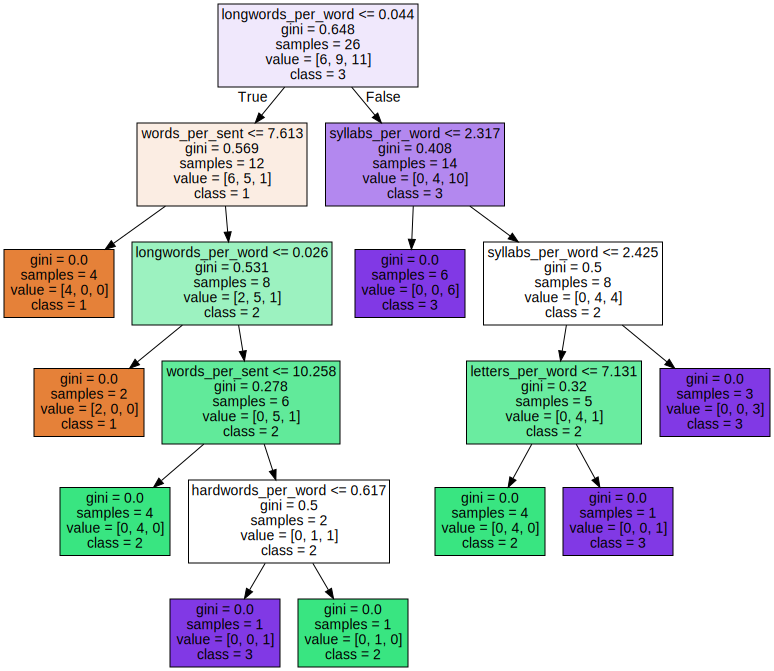

In [ ]:
df2train = ['words_per_sent', 'syllabs_per_word', 'letters_per_word', 'longwords_per_word', 'hardwords_per_word', 'uniquewords_per_word']
X = df2comp2[df2train]
y = df2comp2['grade']
y=y.astype('int')
i = 0
while i < 1:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  clf = DecisionTreeClassifier(max_depth=5)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  i = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
dot_data = tree.export_graphviz(clf, out_file=None, feature_names = df2train,class_names=['1','2','3'], filled=True)
graph = graphviz.Source(dot_data, format="png")
graph.render('decision tree')
graph

### Generovanie systémových požiadaviek pre spustenie jupyter notebooku:

In [ ]:
!pip freeze > requirements.txt